# Homework 6B

This is part of Homework 6.  Due by 11:00pm on March 10, 2023

For the complete assignment and submission instructions, see:
http://faculty.washington.edu/rjl/classes/am574w2023/homework6.html


## Solving the p-system with Clawpack

The main point of this assignment is to get some more experience running Clawpack and producing plots.  There is not much that you have to do for this part of the homework, just run the code provided with 4 sets of initial data corresponding the Riemann problem data from Question 1 of the notebook `hw6A.ipynb`.  This should help you check your solutions found there.

This notebook shows one approach to using Clawpack via a Jupyter notebook, and shows the solution for two of the four sets of data.  You could simply augment this notebook with two more cells to compute and display the results for the other two.

Or you can run clawpack at the command line as explained earlier and as you probably did for hw3.  In that case you will want to modify the Riemann data that is specified in `setrun.py`, run the code, make the plots, and save an appropriate frame of the solution to illustrate the results.

You might want to try doing it both ways.

Although you do not need to turn much in for this problem, produce the required plots to show that you got it working.  Also please spend some time studying the code to understand how things work and ask questions if you don't.  I hope that this will help you see how you might use Clawpack in the future for other problems.

Some things to note as you inspect the code:

- The Fortran 90 module `setprob_module.f90` creates some variables for parameters that can be used in other parts of the code and also defines the function `p(v)` needed for the p-system.

- The subroutine `setprob.f90` reads in the problem-specific parameters need for this particular problem.  Note how these variables are specified in `setrun.py`.  When you do `make .data` these get written out to `setprob.data`, which is subsequently read in by the Fortran code when you `make .output`.

- The subroutine `qinit.f90` sets the initial conditions base on the left and right state specified in `setrun.py`.

- The subroutine `rp1_psystem_roe.f90` implements the Roe solver.

- The code is set up to solve the problem on a very fine grid with 1000 cells, so that the computed solution should be a very good approximation to the true Riemann solution.  Note that this is true even though the Roe solver is used to solve each Riemann problem at every cell interface each time step.  The Roe solver may give a poor approximation to the true Riemann solution in the very first time step, when resolving the initial jump, but the numerical method is consistent with the true flux and so after hundreds of time steps on a fine grid the solution looks quite good.

- The `setplot.py` function prints out the value from the grid cell near $x=0$ at each time so you can see how well this approximates the true state $q_m$ from the Riemann problem being solved (and use it to check your solutions to `hw6A`).

In [12]:
%matplotlib inline
from pylab import *

Check that the CLAW environment variable is set.  (It must be set in the Unix shell before starting the notebook server).

In [13]:
import os


#On the Jupyter Hub you might need to set this from within the notebook,
#e.g. uncomment the next cell and adjust the path if necessary:
os.environ['CLAW'] = '/home/jovyan/clawpack_src/clawpack-v5-9-0'

try:
    CLAW = os.environ['CLAW'] 
    print("Using Clawpack from ", CLAW)
except:
    print("*** Environment variable CLAW must be set to run code")

Using Clawpack from  /home/jovyan/clawpack_src/clawpack-v5-9-0


### Module with functions used to execute system commands and capture output:

In [14]:
from clawpack.clawutil import nbtools
from clawpack.visclaw import animation_tools
from IPython.display import HTML, Image

#### Set the figsize

You might want to adjust this depending on the size of your browser window.

In [15]:
width_image = 400
figsize_animation = (6,7)

### Inline animations:

Using `anim.to_jshtml()` gives animations similar to what you see in the html files if you do `make plots`, but you may prefer the `anim.to_html5_video()` option.  See the [matplotlib.animation.Animation documentation](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.animation.Animation.html) for more information, also on how to save an animation as a separate file.

In [16]:
def show_anim(anim):
    #html_version = HTML(anim.to_jshtml())
    html_version = HTML(anim.to_html5_video())
    return html_version

### Compile the code:

In [17]:
nbtools.make_exe(new=True)  # new=True ==> force recompilation of all code

Executing shell command:   make new
Done...  Check this file to see output:


/home/jovyan/amath574w2023/homeworks/hw6/psystem/compile_output.txt

### Make documentation files:

In [18]:
nbtools.make_htmls()

See the README.html file for links to input files...


/home/jovyan/amath574w2023/homeworks/hw6/psystem/README.html

### Run the code and plot results using the setrun.py and setplot.py files in this directory:

First create data files needed for the Fortran code, using parameters specified in setrun.py:

In [19]:
nbtools.make_data(verbose=False)

Now run the code and produce plots.  Specifying a label insures the resulting plot directory will persist after later runs are done below.

In [34]:
import setrun
rundata = setrun.setrun()
probdata = rundata.probdata

print('Riemann problem data:')
print('vleft = %5.2f     vright = %5.2f' % (probdata.vleft,probdata.vright))
print('uleft = %5.2f     uright = %5.2f' % (probdata.uleft,probdata.uright))

rundata.write()

outdir, plotdir = nbtools.make_output_and_plots(label = '1', verbose=False)

Riemann problem data:
vleft =  1.00     vright =  1.00
uleft = -2.00     uright =  2.00


#### Show one frame of the solution:

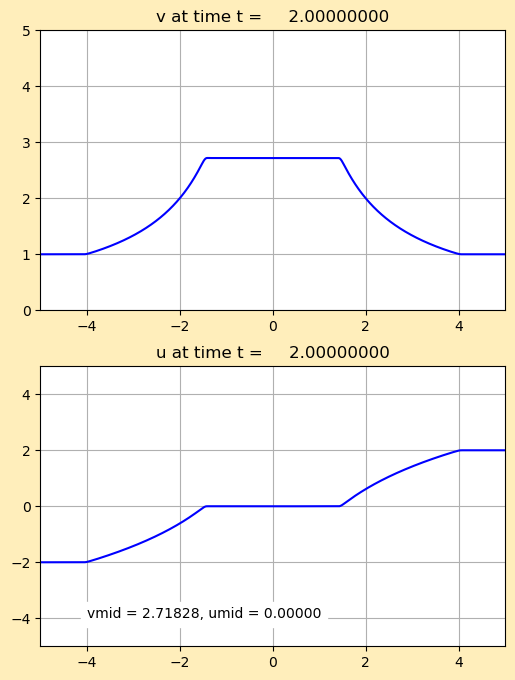

In [23]:
Image('_plots_1/frame0010fig0.png', width=width_image)

Note that this code is set up to solve a Riemann problem with data from Question 5 of hw5 (also Question 1(a) of hw6).

The `setplot.py` function prints out the value `(vmid, umid)` in the middle grid cell, which should be a good approximation to the intermediate state in the Riemann solution for this problem.

### Display the animation inline:

Clicking on the `_PlotIndex` link above, you can view an animation of the results. (This might not work if you run into permission problems with the notebook accessing this webpage.)

After creating all png files in the `_plots` directory, these can also be combined in an animation that is displayed inline:

In [24]:
anim = animation_tools.animate_from_plotdir(plotdir,figsize=(6,7));
show_anim(anim)

Using figno = 0


## Adjust the Riemann problem data

The animation above was computed using the default parameter values specified in `setrun.py`, which specified using the high-resolution method with the MC limiter on a fine grid with 1000 cells.

See the <a href="README.html">README.html</a> file for a link to `setrun.py`.

We can adjust the parameters by reading in the default values, changing one or more, and then  writing the data out for the Fortran code to use.

Here we will leave the grid and method alone but change the Riemann problem data:

### Change the data and run again:

Change the initial conditions and write out the data.  Then rerun the code.

#### Data from Problem 1(b)

In [25]:
probdata.vleft = 1.;   probdata.vright = 2.5
probdata.uleft = 1.;    probdata.uright = -2.

rundata.write()

outdir, plotdir = nbtools.make_output_and_plots(verbose=False)
print('plots can be found in %s' % plotdir)

plots can be found in _plots


Show an earlier time than before. In general you should choose a good time to display the solution, before the waves start to leave the domain!

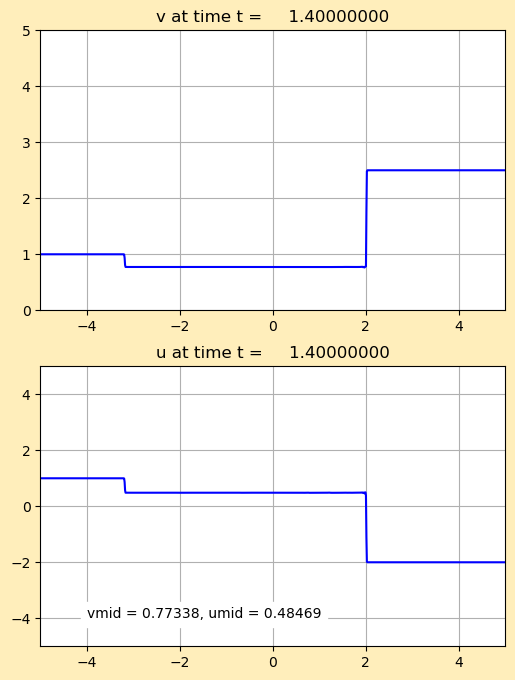

In [26]:
Image('%s/frame0007fig0.png' % plotdir, width=width_image)

In [27]:
anim = animation_tools.animate_from_plotdir(plotdir,figsize=figsize_animation);
show_anim(anim)

Using figno = 0


### Other data

In [28]:
probdata.vleft = 0.5;   probdata.vright = 2.
probdata.uleft = -1.;    probdata.uright = 1.

rundata.write()

outdir, plotdir = nbtools.make_output_and_plots(label = '2', verbose=False)

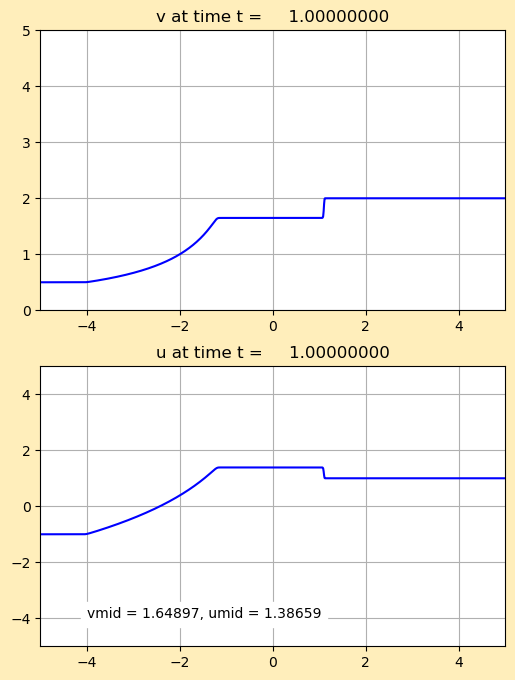

In [29]:
Image('_plots_2/frame0005fig0.png', width=width_image)

In [30]:
anim = animation_tools.animate_from_plotdir(plotdir,figsize=figsize_animation);
show_anim(anim)

Using figno = 0


In [31]:
probdata.vleft = 2.5;   probdata.vright = .2
probdata.uleft = 0.;    probdata.uright = 2.

rundata.write()

outdir, plotdir = nbtools.make_output_and_plots(label = '3', verbose=False)

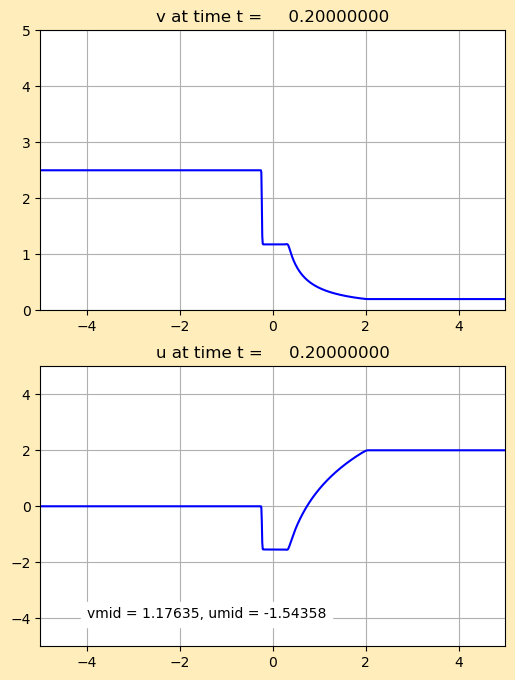

In [32]:
Image('_plots_3/frame0001fig0.png', width=width_image)

In [33]:
anim = animation_tools.animate_from_plotdir(plotdir,figsize=figsize_animation);
show_anim(anim)

Using figno = 0
